In [ ]:
# Workaround - geopandas overlay function works in colab
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
! pip install geopandas==0.5.1
# Install descartes - Geopandas requirment
!pip install descartes 

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,840 kB]
Get:1

In [ ]:
# Atenção!!! usar essa instalação do rasterio pode atrapalhar a matriz de confusão e servir apenas pro Boundng Box!!!!

In [ ]:
pip install rasterio

In [ ]:
# Atenção!!! usar essa instalação do geopandas pode atrapalhar a matriz de confusão e servir apenas pro Boundng Box!!!!

In [ ]:
pip install geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import geopandas as gpd
import pandas as pd
from glob import glob

In [2]:
"""
se área da intersecção (prev_arvore e teste_arvore) for maior que 50% da área do feature do shape de teste_arvore, contar como TP.

se área da intersecção (prev_arvore e teste_arvore) for menor que 50% da área do feature do shape de teste_arvore, contar como FN.

se área da intersecção (prev_nao_arvore e teste_nao_arvore) for maior que 50% da área do feature do shape teste_nao_arvore, contar como TN.

se área da intersecção (prev_nao_arvore e teste_nao_arvore) for menor que 50% da área do feature do shape teste_nao_arvore, contar como FP.

Aqui o loop é sobre as previsões, O QUE NÃO ALIMENTA AS LISTAS actual[] e predicted[] necessárias para obter a matriz de confusão!!!!!!!!!!!!!
"""

# Import preview and test shapefiles for both trees and non-trees classes
shapePrev_Trees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/09Dez2019/Deep_Learning_Arvores_Degrad15x/Trees_Final_CNN09Dez2019_Alt_maior_2m.shp")
shapePrev_noTrees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/09Dez2019/Deep_Learning_Arvores_Degrad15x/Acuracia/Prev_NoTrees_Final_CNN09Dez2019_Alt_maior_2m.shp")
shapeTest_Trees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/09Dez2019/Deep_Learning_Arvores_Degrad15x/Arvores_Geral_Test_Degrad15x.shp")
shapeTest_noTrees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/09Dez2019/Amostras_NAO_Arvores_UTM.shp")

# Intersection between preview and test of trees classes: shapePrev_Trees and shapeTest_Trees
trees_intersect = gpd.overlay(shapePrev_Trees, shapeTest_Trees, how = "intersection")

# Intersection between preview and test of non-trees classes: shapePrev_noTrees and shapeTest_noTrees
noTrees_intersect = gpd.overlay(shapePrev_noTrees, shapeTest_noTrees, how = "intersection")

# Create list to indicate predicted and actual value
actual = []
predicted = []

# Calculate True-Positive (TP): if trees_intersect area is greater than 50% of shapeTest_Trees area, count as TP
TP = []
for feature in trees_intersect["geometry"]:
  # Transform feature in geodataframe
  df1 = gpd.geoseries.GeoSeries(feature)
  df1 = gpd.GeoDataFrame({'geometry': df1})
  df1.crs = {'init': 'epsg:32720'}
  # Select the test polygon that overlaps the intersection feature
  overlap_test  = gpd.sjoin(shapeTest_Trees, df1, how='inner',op='intersects')
  if overlap_test.empty:
    pass
  else:
    # Overlay the union of both shapefiles to transform overlap_test on GeoDataFrame to make it possible to calculate the area
    # Note that "union" is the operation that keeps the spatial join of overlap_test on the original test polygon delineation
    union = gpd.overlay(overlap_test, df1, how = "union")
    # Dissolve using unary_union
    geoms = union.geometry.unary_union
    # Compare if intersection between preview and test of tree classes are greater than 50% of corresponding test tree class polygon
    if feature.area > (geoms.area)/2:
      TP.append(feature)
      #print(TP)
      # The below plot can be used if you wish to visually check intersect polygon (df1 variable) or test polygon (overlap_test) that were counted as TP
      #overlap_test.plot(cmap='cividis', alpha=0.7, edgecolor='black')

# Get the amount of TP by checking TP lenght
print("TP = ", len(TP))

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

TP =  37


C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

In [3]:
"""
se área da intersecção (prev_arvore e teste_arvore) for menor que 50% da área do feature do shape de teste_arvore, contar como FN.

"""

# Calculate False-Negative (FN): if trees_intersect area is smaller than 50% of shapeTest_Trees area, count as FN

FN = []
for feature in shapeTest_Trees["geometry"]:
  # Insert class value on "actual" list, so that it can be futurally used on confusion matrix generation
  actual.append('trees')
  # Transform feature in geodataframe
  df1 = gpd.geoseries.GeoSeries(feature)
  df1 = gpd.GeoDataFrame({'geometry': df1})
  df1.crs = {'init': 'epsg:32720'}
  # Select the intersect polygon that overlaps the test feature
  overlap_intersect  = gpd.sjoin(trees_intersect, df1, how='inner',op='intersects')
  if overlap_intersect.empty:
    FN.append(feature)
    # Insert class value on "predicted" list, so that it can be futurally used on confusion matrix generation
    predicted.append('no trees')
  else:
    # Overlay the intersection of both shapefiles to transform overlap_intersect on GeoDataFrame to make it possible to calculate the area
    # Note that intersection is the operation that turns the spatial join of overlap_intersect back to the original intersect polygon
    intersection2 = gpd.overlay(overlap_intersect, df1, how = "intersection")
    # Dissolve using unary_union
    geoms = intersection2.geometry.unary_union
    # Compare if intersection between test and preview of tree classes are smaller than 50% of corresponding test tree class polygon
    if geoms.area < (feature.area)/2:
      FN.append(feature)
      # Insert class value on "predicted" list, so that it can be futurally used on confusion matrix generation
      predicted.append('no trees')
      #print(FN)
      # The below plot can be used if you wish to visually check test polygon (df1 variable) or intersect polygon (overlap_intersect) that were counted as FN
      #overlap_intersect.plot(cmap='cividis', alpha=0.7, edgecolor='black')
    else:
      # Insert class value on "predicted" list, so that it can be futurally used on confusion matrix generation
      predicted.append('trees')

# Get the amount of FN by checking FN lenght
print("FN = ", len(FN))

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

FN =  11


C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
"""
se área da intersecção (prev_nao_arvore e teste_nao_arvore) for maior que 50% da área do feature do shape teste_nao_arvore, contar como TN.

Aqui o loop é sobre as previsões, O QUE NÃO ALIMENTA AS LISTAS actual[] e predicted[] necessárias para obter a matriz de confusão!!!!!!!!!!!!!

"""


# Calculate True-Negative (TN): if no_trees_intersect area is greater than 50% of shapeTest_noTrees area, count as TN
TN = []
for feature in noTrees_intersect["geometry"]:
  # Transform feature in geodataframe
  df1 = gpd.geoseries.GeoSeries(feature)
  df1 = gpd.GeoDataFrame({'geometry': df1})
  df1.crs = {'init': 'epsg:32720'}
  # Select the test polygon that overlaps the intersection feature
  overlap_test  = gpd.sjoin(shapeTest_noTrees, df1, how='inner',op='intersects')
  if overlap_test.empty:
    pass
  else:
    # Overlay the union of both shapefiles to transform overlap_test on GeoDataFrame to make it possible to calculate the area
    # Note that "union" is the operation that keeps the spatial join of overlap_test on the original test polygon delineation
    union = gpd.overlay(overlap_test, df1, how = "union")
    # Dissolve using unary_union
    geoms = union.geometry.unary_union
    # Compare if intersection between preview and test of tree classes are greater than 50% of corresponding test tree class polygon
    if feature.area > (geoms.area)/2:
      TN.append(feature)
      #print(TN)
      # The below plot can be used if you wish to visually check intersect polygon (df1 variable) or test polygon (overlap_test) that were counted as TN
      #df1.plot(cmap='cividis', alpha=0.7, edgecolor='black')

# Get the amount of TP by checking TP lenght
print("TN = ", len(TN))

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

TN =  50


C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
"""
se área da intersecção (prev_nao_arvore e teste_nao_arvore) for menor que 50% da área do feature do shape teste_nao_arvore, contar como FP.

"""

# Calculate False-Positive (FP): if no_trees_intersect area is smaller than 50% of shapeTest_noTrees area, count as FP

FP = []
for feature in shapeTest_noTrees["geometry"]:
  # Insert class value on "actual" list, so that it can be futurally used on confusion matrix generation
  actual.append('no trees')
  # Transform feature in geodataframe
  df1 = gpd.geoseries.GeoSeries(feature)
  df1 = gpd.GeoDataFrame({'geometry': df1})
  df1.crs = {'init': 'epsg:32720'}
  # Select the intersect polygon that overlaps the test feature
  overlap_intersect  = gpd.sjoin(noTrees_intersect, df1, how='inner',op='intersects')
  if overlap_intersect.empty:
    FN.append(feature)
    # Insert class value on "predicted" list, so that it can be futurally used on confusion matrix generation
    predicted.append('trees')
  else:
    # Overlay the intersection of both shapefiles to transform overlap_intersect on GeoDataFrame to make it possible to calculate the area
    # Note that intersection is the operation that turns the spatial join of overlap_intersect back to the original intersect polygon
    intersection2 = gpd.overlay(overlap_intersect, df1, how = "intersection")
    # Dissolve using unary_union
    geoms = intersection2.geometry.unary_union
    # Compare if intersection between test and preview of tree classes are smaller than 50% of corresponding test tree class polygon
    if geoms.area < (feature.area)/2:
      FP.append(feature)
      # Insert class value on "predicted" list, so that it can be futurally used on confusion matrix generation
      predicted.append('trees')
      #print(FP)
      # The below plot can be used if you wish to visually check test polygon (df1 variable) or intersect polygon (overlap_intersect) that were counted as FP
      overlap_intersect.plot(cmap='cividis', alpha=0.7, edgecolor='black')
    else:
      # Insert class value on "predicted" list, so that it can be futurally used on confusion matrix generation
      predicted.append('no trees')

# Get the amount of FP by checking FP lenght
print("FP = ", len(FP))

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

FP =  0


In [7]:
# TOMAR CUIDADO PRA NÃO RODAR UMA CÉLULA MAIS DE UMA VEZ!!!! ISSO VAI AUMENTAR OS DADOS DAS LISTAS!!!

print(actual)
print(predicted)

['trees', 'trees', 'trees', 'trees', 'trees', 'trees', 'trees', 'trees', 'trees', 'no trees', 'no trees', 'no trees', 'no trees', 'no trees', 'no trees']
['no trees', 'no trees', 'no trees', 'trees', 'no trees', 'trees', 'trees', 'no trees', 'no trees', 'no trees', 'no trees', 'no trees', 'no trees', 'no trees', 'trees']


In [6]:
# Python script for confusion matrix creation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

results = confusion_matrix(actual, predicted)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print('Classification Report : ')
print (classification_report(actual, predicted))

Confusion Matrix :
[[50  0]
 [11 39]]
Accuracy Score : 0.89
Classification Report : 
              precision    recall  f1-score   support

    no trees       0.82      1.00      0.90        50
       trees       1.00      0.78      0.88        50

    accuracy                           0.89       100
   macro avg       0.91      0.89      0.89       100
weighted avg       0.91      0.89      0.89       100



['no trees', 'trees']
[[50  0]
 [11 39]]


C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


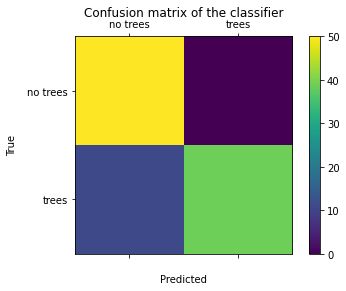

Text(0.5, 15.0, 'Predicted')

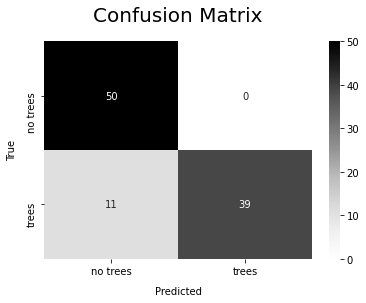

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

labels = ['no trees', 'trees']#o seguinte comando pega valores únicos, mas sem garantir a ordem desejada: list(set(predicted))
print(labels)
print(results)

# Plot using matplotlib only

fig = plt.figure()
# Tamanho do gráfico vai de 1 a 5 nos três algorismos
ax = fig.add_subplot(111)
cax = ax.matshow(results)#cax = ax.matshow(results)
plt.title('Confusion matrix of the classifier', pad=20)
# Bar on the right that indicates numbers and respective colors
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
#labelpad is the distance between label and axis
plt.xlabel('Predicted', labelpad=20)
plt.ylabel('True', labelpad=10)
plt.show()

# Plot using seaborn heatmap

results_df = pd.DataFrame(results,labels,labels)
sns.heatmap(results_df, annot=True, cmap="Greys")#, xticklabels='Predicted', yticklabels='True')
plt.title('Confusion Matrix', fontsize = 20, pad=20)
plt.ylabel('True', labelpad=10)
plt.xlabel('Predicted', labelpad=10)

In [7]:
# Calculate Accuracy indexes based on area only to avoid bias that underestimate small misclassified polygons

#Referência sobre uso da área: title={Good practices for object-based accuracy assessment}, author={Radoux, Julien and Bogaert, Patrick}

"""
área da intersecção (prev_arvore e teste_arvore): contar como TP.

área da diferença simétrica (teste_arvore e TP): contar como FN.

área da intersecção (prev_nao_arvore e teste_nao_arvore): contar como TN.

área da diferença simétrica (teste_nao_arvore e TN): contar como FP.

"""

# Import preview and test shapefiles for both trees and non-trees classes
shapePrev_Trees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/03Dez2019/Deep_Learning_Arvores/Acuracia/Union_CNN03Dez_CNN09Dez.shp")
shapePrev_noTrees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/03Dez2019/Deep_Learning_Arvores/Acuracia/03Dez2019_Prev_naoArvores.shp")
shapeTest_Trees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/03Dez2019/Deep_Learning_Arvores/Acuracia/03Dez2019_Arvores_Teste.shp")
shapeTest_noTrees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/03Dez2019/Deep_Learning_Arvores/Acuracia/RF_2012_naoArvores_Test.shp")

#shapePrev_Trees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/10Dez2019/Deep_Learning_Vismia/Final_CNN10Dez2019_1024.shp")
#shapePrev_noTrees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/10Dez2019/Deep_Learning_Vismia/Prev_Nao_Vismia_1024.shp")
#shapeTest_Trees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/10Dez2019/Deep_Learning_Vismia/Vismia_Copas_Test.shp")
#shapeTest_noTrees = gpd.read_file("C:/Projetos/Vant_Rondonia_Embrapa/10Dez2019/Deep_Learning_Vismia/Nao_Vismia_Test.shp")




# TP: Intersection between preview and test of trees classes: shapePrev_Trees and shapeTest_Trees
trees_intersect = gpd.overlay(shapePrev_Trees, shapeTest_Trees, how = "intersection")
trees_intersect.crs = {'init': 'epsg:32720'}
TP = trees_intersect.unary_union
TP = TP.area
print("TP = ", TP)
#trees_intersect.plot();


# FN: Symmetric difference between test of trees classes and TP: shapeTest_Trees and trees_intersect
FN = gpd.overlay(shapeTest_Trees, trees_intersect, how = "symmetric_difference")
FN.crs = {'init': 'epsg:32720'}
#FN.plot();
FN = FN.unary_union
FN = FN.area
print("FN = ", FN)


# TN: Intersection between preview and test of no_trees classes: shapePrev_noTrees and shapeTest_noTrees
noTrees_intersect = gpd.overlay(shapePrev_noTrees, shapeTest_noTrees, how = "intersection")
noTrees_intersect.crs = {'init': 'epsg:32720'}
TN = noTrees_intersect.unary_union
TN = TN.area
print("TN = ", TN)
#noTrees_intersect.plot();


# FP: Symmetric difference between test of no trees classes and TN: shapeTest_noTrees and noTrees_intersect
FP = gpd.overlay(shapeTest_noTrees, noTrees_intersect, how = "symmetric_difference")
FP.crs = {'init': 'epsg:32720'}
#FP.plot();
FP = FP.unary_union
FP = FP.area
print("FP = ", FP)


C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


TP =  624.0303526899523


C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


FN =  480.14298996356905
TN =  319.6109469126387
FP =  45.62415028911722


C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Rafael\anaconda3\envs\rasterio_gpd\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [8]:
# Calculate accuracy metrics

# Overall Accuracy
acc = (TP + TN)/(TP + TN + FP + FN)
print("Overall Accuracy = ", acc)

# Precision
prec = TP/(TP + FP)
print("Precision = ", prec)

# Recall
rec = TP/(TP + FN)
print("Recall = ", rec)

# F1 score
f1 = 2*(prec*rec)/(prec + rec)
print("F1_score = ", f1)

Overall Accuracy =  0.6421912886899783
Precision =  0.9318691204402411
Recall =  0.5651561476663605
F1_score =  0.7035974254507292


In [9]:
# Calculate Kappa Index

p0 = (TP + TN)/(TP + TN + FP + FN)

pyes = ((TP + FP)/(TP + TN + FP + FN))*((TP + FN)/(TP + TN + FP + FN))

pno = ((FN + TN)/(TP + TN + FP + FN))*((FP + TN)/(TP + TN + FP + FN))

pe = pyes + pno

k = (p0 - pe)/(1 - pe)
print("Kappa Index = ",k)

Kappa Index =  0.3148868581838444


In [6]:
# Print confusion Matriz with area values only

confMat = [[TP, FP], [FN, TN]]
print(confMat[0])
print(confMat[1])

[624.0303526899523, 45.62415028911722]
[480.14298996356905, 319.6109469126387]


In [ ]:
# Código abaixo só caso seja necessário futuramente checar se houve merge em poligonos de interseccção que se tocam

# Import preview and test shapefiles for both trees and non-trees classes
shapePrev_Trees = gpd.read_file("/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/Codigos_Analise_Resultados/Shapefiles/filteredCrowns.shp")
shapePrev_noTrees = gpd.read_file("/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/Codigos_Analise_Resultados/Shapefiles/Tile1_Prev_Nao_Arvores_PR2y.shp")
shapeTest_Trees = gpd.read_file("/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/Codigos_Analise_Resultados/Shapefiles/Tile1_Amostras_Teste_PR2y.shp")
shapeTest_noTrees = gpd.read_file("/content/drive/My Drive/Tutorial_Mask_RCNN/Mask_RCNN/Codigos_Analise_Resultados/Shapefiles/Tile1_Teste_Nao_Arvores_PR2y.shp")

# Intersection between preview and test of trees classes: shapePrev_Trees and shapeTest_Trees
trees_intersect = gpd.overlay(shapePrev_Trees, shapeTest_Trees, how = "intersection")

# Intersection between preview and test of non-trees classes: shapePrev_noTrees and shapeTest_noTrees
noTrees_intersect = gpd.overlay(shapePrev_noTrees, shapeTest_noTrees, how = "intersection")


# Lista contendo os polígonos da instersecção que passaram por merge
mergedShapes = []

for polig1 in trees_intersect["geometry"]:
  for polig2 in trees_intersect["geometry"]:
    # if the files are the same, pass
    if polig1 == polig2:
      pass

    else:
      # Converter polig1 em geodataframe
      df1 = gpd.geoseries.GeoSeries(polig1)
      df1 = gpd.GeoDataFrame({'geometry': df1})
      df1.crs = {'init': 'epsg:32721'}
      # Converter polig2 em geodataframe
      df2 = gpd.geoseries.GeoSeries(polig2)
      df2 = gpd.GeoDataFrame({'geometry': df2})
      df2.crs = {'init': 'epsg:32721'}
      if polig1.touches(polig2):
        merge = gpd.overlay(df1, df2, how = "union")
        # Calculate the unary_union (dissolve)
        dissolve = merge.geometry.unary_union
        # Evalute if the Geometry is empty
        if (str(type(dissolve)) == "<class 'shapely.geometry.collection.GeometryCollection'>"):
          pass
        else:
          mergedShapes.append(dissolve)
          # O df3 abaixo é só pra visualizar através da função plot o que o algoritmo está fazendo. Depois que acertar o código o df3 abaixo será deletado!!!!!!!
          #df3 = gpd.geoseries.GeoSeries(dissolve)
          #df3 = gpd.GeoDataFrame({'geometry': df3})
          #df3.crs = {'init': 'epsg:32721'}
          #df3.plot(cmap='cividis', alpha=0.7, edgecolor='black')
          #print(dissolve)
      else:
        pass

# Unir e dissolver elementos que se sobrepõem
for a1 in mergedShapes["geometry"]:
  for a2 in mergedShapes["geometry"]:
    merge2 = gpd.overlay(a1, a2, how = "union")
    # Calculate the unary_union (dissolve)
    dissolve = merge.geometry.unary_union
  print(a1)

# Deletar polígonos iguais na lista - NÃO FUNCIONA PORQUE DELETA UM POLÍGONO QUE DEIXA DE SER AVALIADO NO LOOP
#for a1 in mergedShapes:
  #for a2 in mergedShapes:
    #if a2 == a1:
      #del mergedShapes[mergedShapes.index(a2)]
    #else:
      #pass
  #print(a1)

df = gpd.geoseries.GeoSeries(mergedShapes)
df = gpd.GeoDataFrame({'geometry': df})
df.crs = {'init': 'epsg:32721'}
df.plot(cmap='cividis', alpha=0.7, edgecolor='black')
# Apagar feições da intersecção que se sobrepõem com shapes que passaram por merge e juntar tais arquivos merge com o shape de interseção


TypeError: ignored